## Load Dataset from 🤗

### Dataset Toxic/Hate-speech

In [2]:
from datasets import load_dataset

dataset = load_dataset('s-nlp/en_paradetox_toxicity')
dataset

DatasetDict({
    train: Dataset({
        features: ['comment', 'toxic'],
        num_rows: 26507
    })
})

In [3]:
import pandas as pd
df1 = pd.DataFrame(dataset['train'])
df1.head()

,comment,toxic
0,ryan is as big a bum as the jerk in the white ...,True
1,You sure are a racist!,True
2,it is easy to spot those racist.,False
3,btw jonhson county is a real shithole in case ...,True
4,How many people does it take to change light b...,False


In [172]:
df.shape

(26507, 4)

#### dataset 2

In [4]:
dataset2 = load_dataset('dair-ai/emotion')
dataset2
# df2 = pd.DataFrame(dataset2['train'])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_df = pd.DataFrame(dataset2['train'])
validation_df = pd.DataFrame(dataset2['validation'])
test_df = pd.DataFrame(dataset2['test'])

# Concatenate the DataFrames
df2 = pd.concat([train_df, validation_df, test_df], ignore_index=True)
df2
# Filter the DataFrame to include rows with label value 3
df2_toxic = df2[df2['label'] == 3].replace(3, True)

df2_toxic.rename(columns={'text': 'comment', 'label':'toxic'}, inplace=True)
df2_toxic.rename

df2_toxic.head()


,comment,toxic
2,im grabbing a minute to post i feel greedy wrong,True
4,i am feeling grouchy,True
12,i think it s the easiest time of year to feel ...,True
20,i feel irritated and rejected without anyone d...,True
24,i already feel like i fucked up though because...,True


#### dataset concat

In [6]:
df = pd.concat([df1, df2_toxic], ignore_index=True)
df

,comment,toxic
0,ryan is as big a bum as the jerk in the white ...,True
1,You sure are a racist!,True
2,it is easy to spot those racist.,False
3,btw jonhson county is a real shithole in case ...,True
4,How many people does it take to change light b...,False
...,...,...
29211,i came out of the airport that makes me feel i...,True
29212,i feel tortured delilahlwl am considering i ha...,True
29213,i told my fiance how i am feeling so angry and...,True
29214,i just keep feeling like someone is being unki...,True


In [16]:
import pandas as pd

df = pd.read_csv('./dataset/data.csv')
df

,comment,toxic,new_comment,toxic_encoded
0,ryan is as big a bum as the jerk in the white ...,True,"['ryan', 'be', 'as', 'big', 'a', 'bum', 'as', ...",1
1,You sure are a racist!,True,"['you', 'sure', 'be', 'a', 'racist']",1
2,it is easy to spot those racist.,False,"['it', 'be', 'easy', 'to', 'spot', 'those', 'r...",0
3,btw jonhson county is a real shithole in case ...,True,"['btw', 'jonhson', 'county', 'be', 'a', 'real'...",1
4,How many people does it take to change light b...,False,"['how', 'many', 'people', 'do', 'it', 'take', ...",0
...,...,...,...,...
29211,i came out of the airport that makes me feel i...,True,"['i', 'come', 'out', 'of', 'the', 'airpo', 'th...",1
29212,i feel tortured delilahlwl am considering i ha...,True,"['i', 'feel', 'to', 'ured', 'delilahlwl', 'be'...",1
29213,i told my fiance how i am feeling so angry and...,True,"['i', 'tell', 'my', 'fiance', 'how', 'i', 'be'...",1
29214,i just keep feeling like someone is being unki...,True,"['i', 'just', 'keep', 'feel', 'like', 'someone...",1


### Hoax Dataset

#### d1

In [210]:
hoax1 = load_dataset('pauwdanny/indonesian_hoax_news_dataset')
df = pd.DataFrame(hoax1['train'])

In [211]:
df

,berita,tagging
0,"JAKARTA, Spokesperson for the Ministry of Fore...",Hoax
1,"After the boom of the Pokemon Go game, several...",Valid
2,Did you know that stroke is a dangerous health...,Hoax
3,Terrorist inmates at the Mobile Brigade Comman...,Valid
4,Is it true that Facebook will be closed on Apr...,Valid
...,...,...
817,The Pokemon hunting fever with the latest game...,Valid
818,Regarding the finding of candy snacks containi...,Hoax
819,The Muslim community was shocked by the news a...,Hoax
820,Garuda News – People who are hit by a STROKE a...,Hoax


#### d2

In [222]:
# hoax2 = load_dataset('Rifky/indonesian-hoax-news')
# df2 = pd.DataFrame(hoax2['train'])
df2 = df2[['title']]
df2

,title
0,[SALAH] Hillary Clinton Mengaku Terinspirasi o...
1,[SALAH] Foto Gadis 16 Tahun Yang Dipenjara 25 ...
2,[SALAH] Detik-Detik Densus 88 Bekuk Anak Kiai ...
3,[SALAH] Zul Zivilia Dieksekusi Mati – TurnBack...
4,[SALAH) Akun Whatsapp Kadis Kominfosanti Ketut...
...,...
17801,[DISINFORMASI] Perlakuan Berbeda antara GNPF M...
17802,Pilot Garuda Berkata Rasis saat Petugas Bea Cu...
17803,Surat Penetapan Pemberangkatan Haji Tahun 2018
17804,"""Ramai Berita SetNov Warga China Terus Datang"""


In [246]:
df2 = df2[df2['title'].str.contains('\[.*\]')]

In [275]:
df2['label'] = df2['title'].str.extract(r'\[(.*?)\]')
df2["title"] = df2['title'].str.replace(r'\[(.*?)\]', '')
df2.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'] = df2['title'].str.extract(r'\[(.*?)\]')
C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["title"] = df2['title'].str.replace(r'\[(.*?)\]', '')
C:\Users\Acer\AppData\Local\Temp\ipykernel_25776\1086561425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["title"] =

,title,label
0,Hillary Clinton Mengaku Terinspirasi oleh Sri...,SALAH
1,Foto Gadis 16 Tahun Yang Dipenjara 25 Tahun K...,SALAH
2,Detik-Detik Densus 88 Bekuk Anak Kiai Kasus P...,SALAH
3,Zul Zivilia Dieksekusi Mati – TurnBackHoax.ID,SALAH
5,Video Cara Mengecek Minyak Goreng Bekas dan B...,SALAH


In [296]:
df2['title'][0]

' Hillary Clinton Mengaku Terinspirasi oleh Sri Mulyani dan Jokowi pada Debat Calon Presiden Amerika Serikat – TurnBackHoax.ID'

In [278]:
df2['label']

SALAH                  12351
KLARIFIKASI              575
HOAKS                    521
BENAR                    466
DISINFORMASI             421
                       ...  
Benar                      1
INFORMASI & EDUKASI        1
SCAM                       1
Hoax                       1
SATIRE                     1
Name: label, Length: 63, dtype: int64

#### d3

In [280]:
hoax3 = load_dataset('UKPLab/liar')
hoax3
# df3 = pd.DataFrame(hoax3['train'])

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 10269
    })
    validation: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 1284
    })
    test: Dataset({
        features: ['text', 'label_text', 'labels', 'context'],
        num_rows: 1283
    })
})

In [282]:
train = pd.DataFrame(hoax3['train'])
test = pd.DataFrame(hoax3['test'])
val = pd.DataFrame(hoax3['validation'])
df3 = pd.concat([train, test, val], ignore_index=True)
df3

,text,label_text,labels,context
0,Dwayne Bohac says the Annies List political gr...,false statement,1,a mailer
1,Scott Surovell says When did the decline of co...,true statement,0,a floor speech.
2,Barack Obama says Hillary Clinton agrees with ...,true statement,0,Denver
3,Blog Posting says Health care reform legislati...,false statement,1,a news release
4,Charlie Crist says The economic turnaround sta...,true statement,0,an interview on CNN
...,...,...,...,...
12831,Barack Obama says For the first time in more t...,true statement,0,a press conference
12832,Hillary Clinton says Donald Trump has bankrupt...,true statement,0,a speech on the economy
12833,Campaign Defend America says John McCain and G...,true statement,0,a television ad
12834,"Americans United Change says ""A new poll shows...",false statement,1,an Internet ad.


In [295]:
df3['text'][1]

'Scott Surovell says When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

## Preprocessing

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
contractions = {
    "aint": "am not",
    "arent": "are not",
    "cant": "cannot",
    "cantve": "cannot have",
    "cause": "because",
    "couldve": "could have",
    "couldnt": "could not",
    "couldntve": "could not have",
    "didnt": "did not",
    "doesnt": "does not",
    "dont": "do not",
    "dont": "do not",
    "hadnt": "had not",
    "hadntve": "had not have",
    "hasnt": "has not",
    "havent": "have not",
    "hed": "he would",
    "hedve": "he would have",
    "hell": "he will",
    "hellve": "he will have",
    "hes": "he is",
    "howd": "how did",
    "howdy": "how do you",
    "howll": "how will",
    "hows": "how is",
    "Id": "I would",
    "Idve": "I would have",
    "Ill": "I will",
    "Illve": "I will have",
    "Im": "I am",
    "Ive": "I have",
    "isnt": "is not",
    "itd": "it had",
    "itdve": "it would have",
    "itll": "it will",
    "itllve": "it will have",
    "its": "it is",
    "lets": "let us",
    "maam": "madam",
    "maynt": "may not",
    "mightve": "might have",
    "mightnt": "might not",
    "mightntve": "might not have",
    "mustve": "must have",
    "mustnt": "must not",
    "mustntve": "must not have",
    "neednt": "need not",
    "needntve": "need not have",
    "oclock": "of the clock",
    "oughtnt": "ought not",
    "oughtntve": "ought not have",
    "shant": "shall not",
    "shant": "shall not",
    "shantve": "shall not have",
    "shed": "she would",
    "shedve": "she would have",
    "shell": "she will",
    "shellve": "she will have",
    "shes": "she is",
    "shouldve": "should have",
    "shouldnt": "should not",
    "shouldntve": "should not have",
    "sove": "so have",
    "sos": "so is",
    "thatd": "that would",
    "thatdve": "that would have",
    "thats": "that is",
    "thered": "there had",
    "theredve": "there would have",
    "theres": "there is",
    "theyd": "they would",
    "theydve": "they would have",
    "theyll": "they will",
    "theyllve": "they will have",
    "theyre": "they are",
    "theyve": "they have",
    "tove": "to have",
    "wasnt": "was not",
    "wasnt": "was not",
    "wed": "we had",
    "wedve": "we would have",
    "well": "we will",
    "wellve": "we will have",
    "were": "we are",
    "weve": "we have",
    "werent": "were not",
    "whatll": "what will",
    "whatllve": "what will have",
    "whatre": "what are",
    "whats": "what is",
    "whatve": "what have",
    "whens": "when is",
    "whenve": "when have",
    "whered": "where did",
    "wheres": "where is",
    "whereve": "where have",
    "wholl": "who will",
    "whollve": "who will have",
    "whos": "who is",
    "whove": "who have",
    "whys": "why is",
    "whyve": "why have",
    "willve": "will have",
    "wont": "will not",
    "wontve": "will not have",
    "wouldve": "would have",
    "wouldnt": "would not",
    "wouldntve": "would not have",
    "yall": "you all",
    "yalld": "you all would",
    "yalldve": "you all would have",
    "yallre": "you all are",
    "yallve": "you all have",
    "youd": "you had",
    "youdve": "you would have",
    "youll": "you will",
    "youllve": "you will have",
    "youre": "you are",
    "youve": "you have",
}

def expand_contractions(text, contractions=contractions):
    words = text.split()
    expanded_text = ' '.join([contractions[word] if word in contractions else word for word in words])
    return expanded_text

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'no', 'not'}

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def remove_nonaplhanumeric(text):
    text = re.sub("[']", '', text)
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text
    
def preprocess(text):
    text = text.lower()
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = expand_contractions(text)
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(text) if word not in stop_words]
    # text = ' '.join(tokens)
    return tokens

In [19]:
df['new_comment'] = df['comment'].apply(preprocess)
df

,comment,toxic,new_comment,toxic_encoded
0,ryan is as big a bum as the jerk in the white ...,True,"[ryan, big, bum, jerk, white, house]",1
1,You sure are a racist!,True,"[sure, racist]",1
2,it is easy to spot those racist.,False,"[easy, spot, racist]",0
3,btw jonhson county is a real shithole in case ...,True,"[btw, jonhson, county, real, shithole, case, w...",1
4,How many people does it take to change light b...,False,"[many, people, take, change, light, bulb]",0
...,...,...,...,...
29211,i came out of the airport that makes me feel i...,True,"[come, airpo, make, feel, irritable, uncomfo, ...",1
29212,i feel tortured delilahlwl am considering i ha...,True,"[feel, ured, delilahlwl, consider, one, day, o...",1
29213,i told my fiance how i am feeling so angry and...,True,"[tell, fiance, feel, angry, upset]",1
29214,i just keep feeling like someone is being unki...,True,"[keep, feel, like, someone, unkind, wrong, thi...",1


In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'toxic' column
df['toxic_encoded'] = encoder.fit_transform(df[['toxic']]).astype(int)
df.head(3)


,comment,toxic,new_comment,toxic_encoded
0,ryan is as big a bum as the jerk in the white ...,True,"[ryan, be, as, big, a, bum, as, the, jerk, in,...",1
1,You sure are a racist!,True,"[you, sure, be, a, racist]",1
2,it is easy to spot those racist.,False,"[it, be, easy, to, spot, those, racist]",0


In [124]:
df.to_csv('data.csv', index=False)

# Get Insight

In [20]:
df['toxic'].value_counts()

False    22498
True      6718
Name: toxic, dtype: int64

<AxesSubplot:xlabel='toxic'>

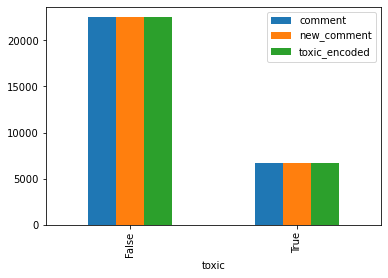

In [21]:
df.groupby('toxic').count().plot.bar()

# Classification

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['new_comment'], df['toxic_encoded'], test_size=0.15, shuffle=False)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24833,), (4383,), (24833,), (4383,))

In [129]:
import re
import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = defaultdict(float)
        self.word_given_class_probabilities = defaultdict(lambda: defaultdict(float))

    def fit(self, X, y, smoothing=False):
        alpha = 0.0
        if smoothing:
            alpha = 1.0
            print('\n\n===== Naive Bayes w/ Laplace smoothing =====')
        else:
            print('\n\n===== Naive Bayes w/o Laplace smoothing =====')

        total_documents = len(X)

        for label in set(y):
            print(f'\n--> Words in label: {label}\n')
            documents_in_class = sum(1 for label_i in y if label_i == label)

            if smoothing:
                self.class_probabilities[label] = (documents_in_class + alpha) / (total_documents + alpha * len(set(y)))
                print(f'P({label}) = ({documents_in_class} + {alpha}) / ({total_documents} + {alpha} * {len(set(y))}) = {self.class_probabilities[label]}\n')
            else:
                self.class_probabilities[label] = documents_in_class / total_documents
                print(f'P({label}) = {documents_in_class} / {total_documents} = {self.class_probabilities[label]}\n')
        
            words_in_class = [word for sublist in [X[i] for i in range(len(X)) if y[i] == label] for word in sublist]
            total_words_in_class = len(words_in_class)
            print(f'Total words in class {label} = {total_words_in_class}\n')

            for word in set(words_in_class):
                word_frequency = words_in_class.count(word)
                print(f'{word} appears {word_frequency} times')

                if smoothing:
                    self.word_given_class_probabilities[label][word] = (word_frequency + alpha) / (total_words_in_class + alpha * len(set(words_in_class)))
                    print(f'P({word}|{label}) = ({word_frequency} + {alpha}) / ({total_words_in_class} + {alpha} * {len(set(words_in_class))}) = {self.word_given_class_probabilities[label][word]}')
                else:
                    self.word_given_class_probabilities[label][word] = word_frequency / total_words_in_class
                    print(f'P({word}|{label}) = {word_frequency} / {total_words_in_class} = {self.word_given_class_probabilities[label][word]}')

    def predict(self, document):
        scores = defaultdict(float)
        for label in self.class_probabilities:
            scores[label] = math.log(self.class_probabilities[label])

            for word in document:
                if word in self.word_given_class_probabilities[label]:
                    scores[label] += math.log(self.word_given_class_probabilities[label][word])
        print(scores)
        return max(scores, key=scores.get)

In [138]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train, smoothing=False)



===== Naive Bayes w/o Laplace smoothing =====

--> Words in label: 0

P(0) = 21032 / 24833 = 0.8469375427858092



Total words in class 0 = 97329

disturb appears 17 times
P(disturb|0) = 17 / 97329 = 0.00017466531044190323
clown appears 5 times
P(clown|0) = 5 / 97329 = 5.137215012997154e-05
tuesday appears 1 times
P(tuesday|0) = 1 / 97329 = 1.0274430025994308e-05
nfl appears 6 times
P(nfl|0) = 6 / 97329 = 6.164658015596584e-05
financially appears 1 times
P(financially|0) = 1 / 97329 = 1.0274430025994308e-05
youself appears 2 times
P(youself|0) = 2 / 97329 = 2.0548860051988615e-05
identical appears 1 times
P(identical|0) = 1 / 97329 = 1.0274430025994308e-05
fresh appears 9 times
P(fresh|0) = 9 / 97329 = 9.246987023394877e-05
aweful appears 1 times
P(aweful|0) = 1 / 97329 = 1.0274430025994308e-05
indian appears 3 times
P(indian|0) = 3 / 97329 = 3.082329007798292e-05
air appears 21 times
P(air|0) = 21 / 97329 = 0.00021576303054588047
pan appears 2 times
P(pan|0) = 2 / 97329 = 2.0548860051988615e-05
anonymous appears 9 times
P(anonymous|0) = 9 / 97329 = 9.246987023394877e-05
sponsor appears 1 times
P(s

In [163]:
nb_laplace_classifier = NaiveBayesClassifier()
nb_laplace_classifier.fit(X_train, y_train, smoothing=True)



===== Naive Bayes w/ Laplace smoothing =====

--> Words in label: 0

P(0) = (21032 + 1.0) / (24833 + 1.0 * 2) = 0.8469096033823234

Total words in class 0 = 97329

disturb appears 17 times
P(disturb|0) = (17 + 1.0) / (97329 + 1.0 * 9399) = 0.00016865302451090622
clown appears 5 times
P(clown|0) = (5 + 1.0) / (97329 + 1.0 * 9399) = 5.621767483696874e-05
tuesday appears 1 times
P(tuesday|0) = (1 + 1.0) / (97329 + 1.0 * 9399) = 1.8739224945656247e-05
nfl appears 6 times
P(nfl|0) = (6 + 1.0) / (97329 + 1.0 * 9399) = 6.558728730979687e-05
financially appears 1 times
P(financially|0) = (1 + 1.0) / (97329 + 1.0 * 9399) = 1.8739224945656247e-05
youself appears 2 times
P(youself|0) = (2 + 1.0) / (97329 + 1.0 * 9399) = 2.810883741848437e-05
identical appears 1 times
P(identical|0) = (1 + 1.0) / (97329 + 1.0 * 9399) = 1.8739224945656247e-05
fresh appears 9 times
P(fresh|0) = (9 + 1.0) / (97329 + 1.0 * 9399) = 9.369612472828124e-05
aweful appears 1 times
P(aweful|0) = (1 + 1.0) / (97329 + 1.0 * 

## Metric Performance

In [168]:

def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same.")
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [166]:
y_pred = []
for word in X_test:
    pred = nb_classifier.predict(word)
    y_pred.append(pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy*100:.2f}%')

defaultdict(<class 'float'>, {0: -30.192868340667516, 1: -28.717331076350703})
defaultdict(<class 'float'>, {0: -43.97698949790055, 1: -35.50670019665786})
defaultdict(<class 'float'>, {0: -14.078315386225936, 1: -17.913248663513457})
defaultdict(<class 'float'>, {0: -20.60238066856746, 1: -22.320401421134562})
defaultdict(<class 'float'>, {0: -33.11727713250085, 1: -35.110883433992726})
defaultdict(<class 'float'>, {0: -15.668436210357816, 1: -19.111411336612946})
defaultdict(<class 'float'>, {0: -27.30394280273353, 1: -17.64855957410375})
defaultdict(<class 'float'>, {0: -6.696153539822979, 1: -8.454969250441362})
defaultdict(<class 'float'>, {0: -20.394741303789214, 1: -21.308800509456077})
defaultdict(<class 'float'>, {0: -15.553847896383623, 1: -18.10457696137475})
defaultdict(<class 'float'>, {0: -7.321247257137909, 1: -9.222224403155028})
defaultdict(<class 'float'>, {0: -40.858852077477366, 1: -31.439938449050903})
defaultdict(<class 'float'>, {0: -23.65630550082214, 1: -26.954

In [167]:
y_pred = []
for word in X_test:
    pred = nb_laplace_classifier.predict(word)
    y_pred.append(pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy*100:.2f}%')

defaultdict(<class 'float'>, {0: -29.45354040657599, 1: -28.132124446261482})
defaultdict(<class 'float'>, {0: -43.52470016324266, 1: -34.99060867623683})
defaultdict(<class 'float'>, {0: -14.241210321887815, 1: -18.01554367826465})
defaultdict(<class 'float'>, {0: -20.828280192983414, 1: -22.669706069033023})
defaultdict(<class 'float'>, {0: -33.64715959544678, 1: -36.24290531266347})
defaultdict(<class 'float'>, {0: -15.939201113202838, 1: -19.676976885817126})
defaultdict(<class 'float'>, {0: -26.972206885813456, 1: -18.233126958998223})
defaultdict(<class 'float'>, {0: -6.7813555062651085, 1: -8.626011642503439})
defaultdict(<class 'float'>, {0: -20.62760949752126, 1: -21.794237331679124})
defaultdict(<class 'float'>, {0: -15.822361424140537, 1: -18.663489618728114})
defaultdict(<class 'float'>, {0: -7.400394714671332, 1: -9.354250142874655})
defaultdict(<class 'float'>, {0: -40.68306410476823, 1: -31.419993142616633})
defaultdict(<class 'float'>, {0: -23.973915571231217, 1: -27.57

## Test on sentences

In [140]:
testing = 'you are so fat'
testing = preprocess(testing)
# pred_no_smoothing = nb_no_smoothing.predict(testing)
pred = nb_classifier.predict(testing)
print(pred)

defaultdict(<class 'float'>, {0: -9.706070448368928, 1: -9.302267110828565})
1
